In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_excel(r'/content/drive/MyDrive/Data_Train.xlsx')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [ ]:
df['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [ ]:
df['jorney_day']=pd.to_datetime(df.Date_of_Journey,format="%d/%m/%Y").dt.day

In [ ]:
df['journey_month']=pd.to_datetime(df['Date_of_Journey'],format="%d/%m/%Y").dt.month

In [ ]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,jorney_day,journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [ ]:
df.drop(['Date_of_Journey'],axis=1,inplace=True)

In [ ]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,jorney_day,journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [ ]:
df['dep_hour']=pd.to_datetime(df.Dep_Time).dt.hour
df['dep_minute']=pd.to_datetime(df.Dep_Time).dt.minute

In [ ]:
df.drop(['Dep_Time'],axis=1,inplace=True)

In [ ]:
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,jorney_day,journey_month,dep_hour,dep_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [ ]:
df['arrival_hour']=pd.to_datetime(df.Arrival_Time).dt.hour
df['arrival_minute']=pd.to_datetime(df.Arrival_Time).dt.minute
df.drop(['Arrival_Time'],axis=1,inplace=True)

In [ ]:
duration=list(df['Duration'])
for i in range(len(duration)):
  if len(duration[i].split()) != 2:
    if 'h' in duration[i]:
      duration[i]=duration[i].strip() + ' ' +'0m'
    else:
      duration[i]='0h'+' ' + duration[i]



In [ ]:
for i in range(len(duration)):
    if 'm' not in duration[i]:
      print('m')

In [ ]:

duration_hours=[]
duration_minutes=[]
for i in range(len(duration)):
  duration_hours.append((duration[i].split(sep='h')[0]))
  duration_minutes.append((duration[i].split(sep='m')[0].split()[-1]))

In [ ]:
df['duration_hours']=duration_hours
df['duration_minutes']=duration_minutes

In [ ]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,jorney_day,journey_month,dep_hour,dep_minute,arrival_hour,arrival_minute,duration_hours,duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [ ]:
df.drop(['Duration'],axis=1,inplace=True)

In [ ]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,jorney_day,journey_month,dep_hour,dep_minute,arrival_hour,arrival_minute,duration_hours,duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [ ]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

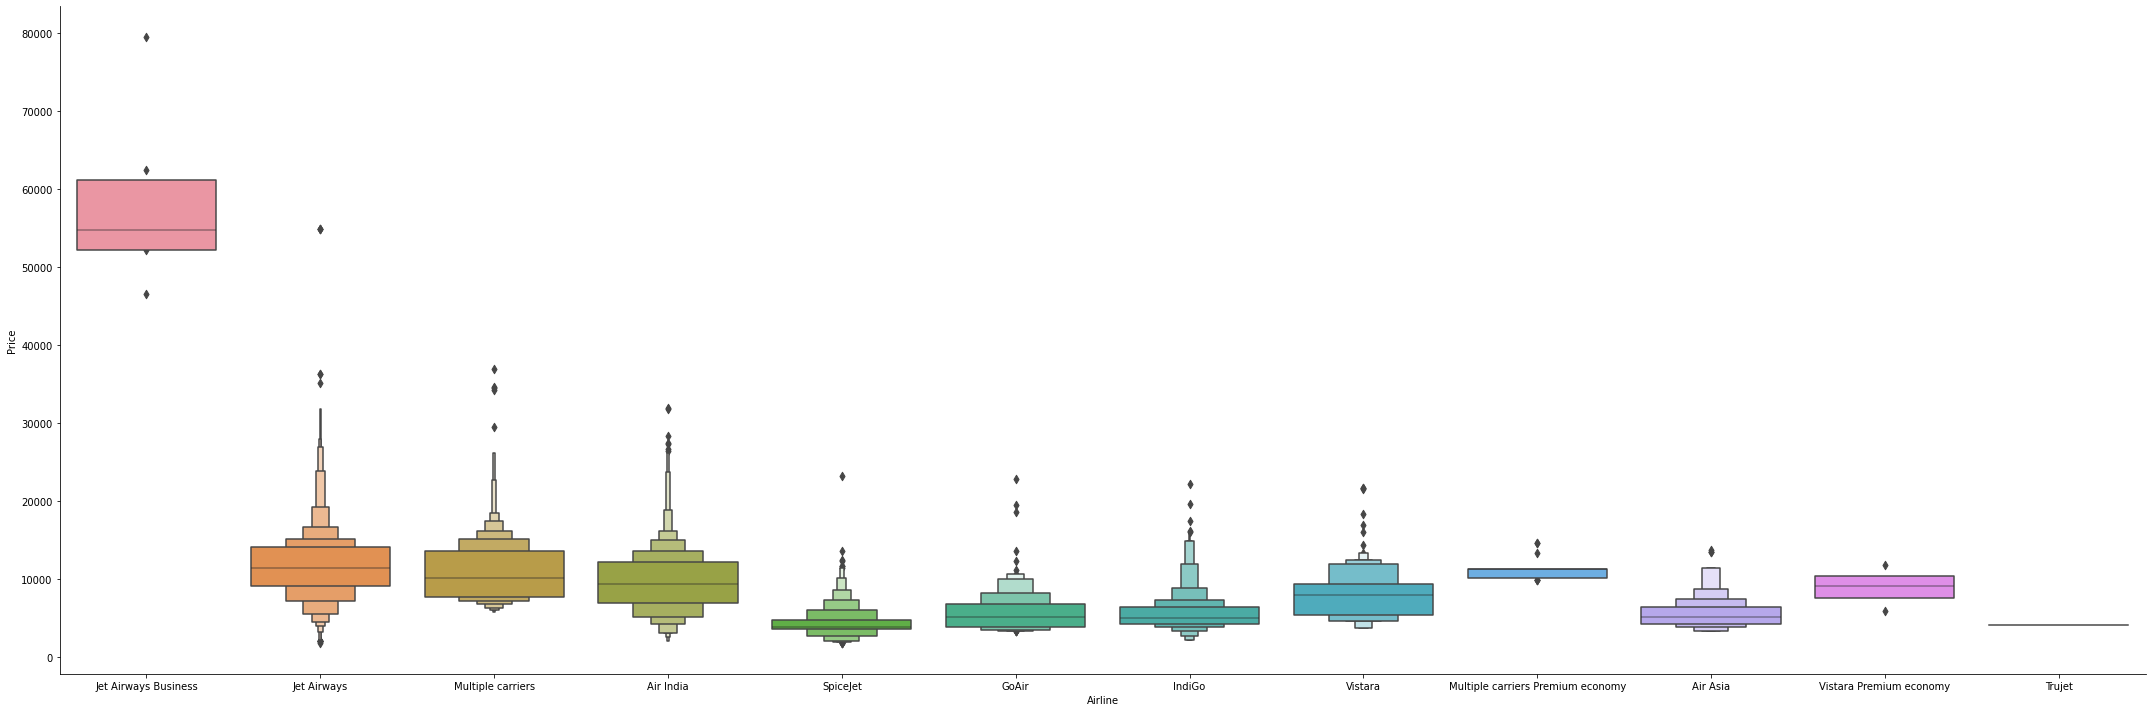

In [ ]:
sns.catplot(y='Price',x='Airline',data=df.sort_values("Price",ascending=False) ,kind='boxen',height=10,aspect=3)
plt.show()

In [ ]:
Airline = df[['Airline']]
Airline = pd.get_dummies(Airline,drop_first=True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
df['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

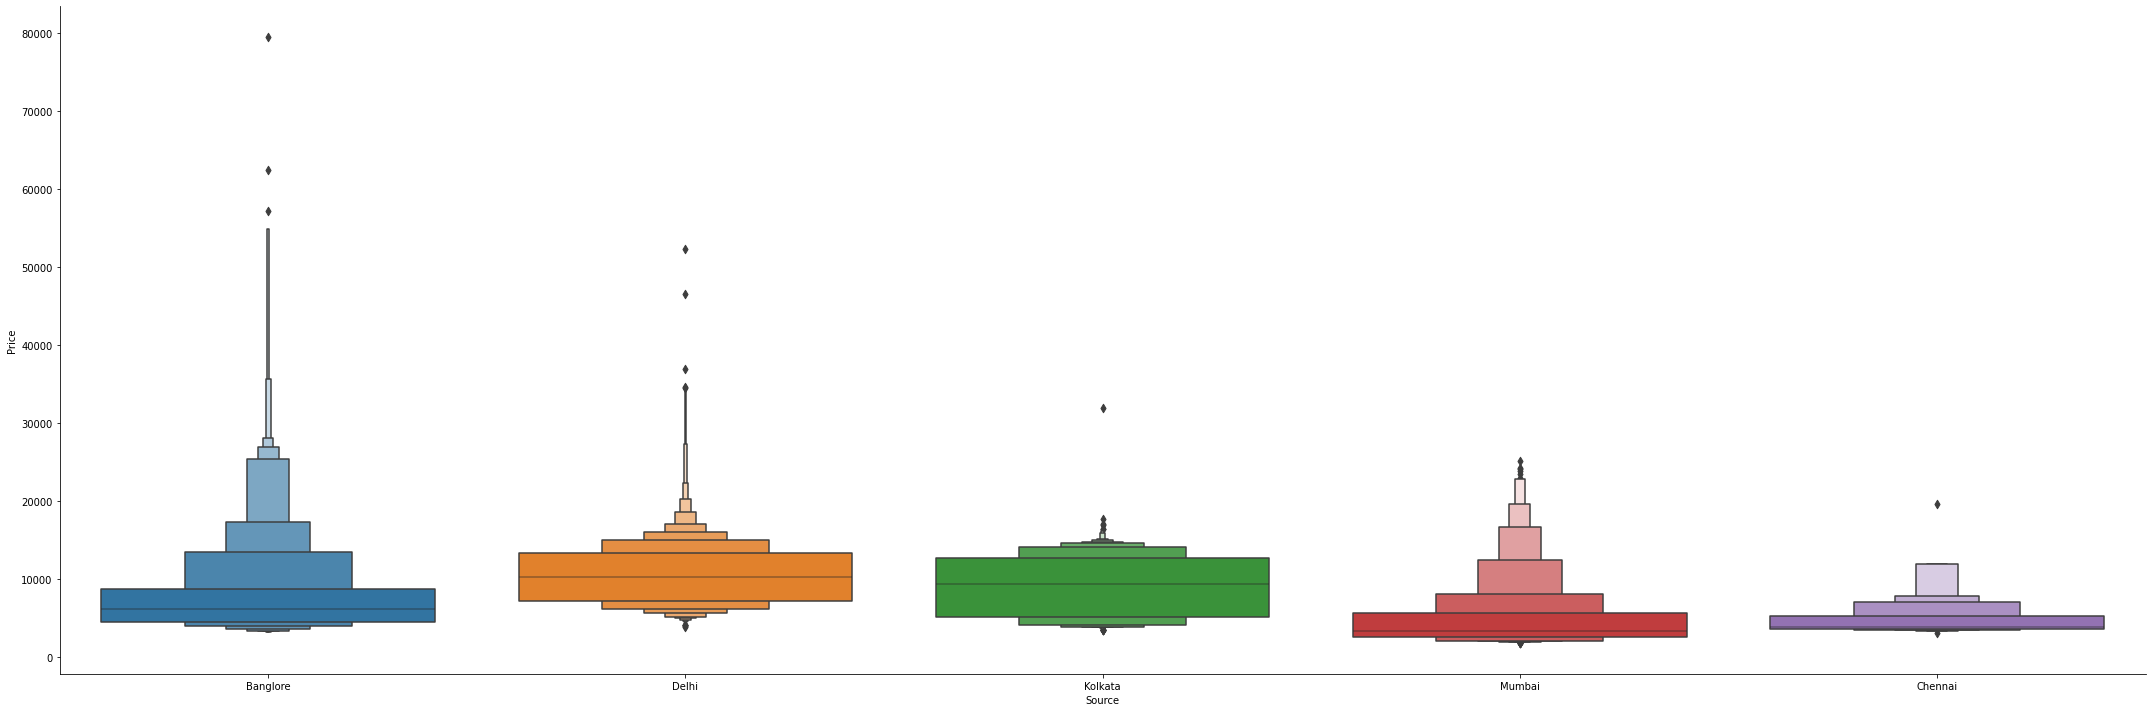

In [ ]:
sns.catplot(y='Price',x='Source',data=df.sort_values("Price",ascending=False) ,kind='boxen',height=10,aspect=3)
plt.show()

In [ ]:
Source = df[['Source']]
Source = pd.get_dummies(Source,drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [ ]:
Dest=df[['Destination']]
Dest=pd.get_dummies(Dest,drop_first=True)
Dest.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [ ]:
df.drop(['Route','Additional_Info'],axis=1,inplace=True)

In [ ]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,jorney_day,journey_month,dep_hour,dep_minute,arrival_hour,arrival_minute,duration_hours,duration_minutes
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45


In [ ]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [ ]:
df.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)

In [ ]:
data=pd.concat([df,Source,Dest,Airline],axis=1)

In [ ]:
data.head()

,Airline,Source,Destination,Total_Stops,Price,jorney_day,journey_month,dep_hour,dep_minute,arrival_hour,...,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,...,0,1,0,0,0,0,0,0,0,0
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,...,0,0,0,0,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,...,0,0,1,0,0,0,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,...,0,1,0,0,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
data=pd.concat([df,Source,Dest,Airline],axis=1)

In [ ]:
data.head()

,Airline,Source,Destination,Total_Stops,Price,jorney_day,journey_month,dep_hour,dep_minute,arrival_hour,...,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,...,0,1,0,0,0,0,0,0,0,0
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,...,0,0,0,0,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,...,0,0,1,0,0,0,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,...,0,1,0,0,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
data.drop(['Airline','Source','Destination'],axis=1,inplace=True)

KeyError: ignored

In [ ]:
data.head()

,Total_Stops,Price,jorney_day,journey_month,dep_hour,dep_minute,arrival_hour,arrival_minute,duration_hours,duration_minutes,...,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,3897,24,3,22,20,1,10,2,50,...,0,1,0,0,0,0,0,0,0,0
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,0,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,0,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,1,0,0,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
data_test=pd.read_excel(r'/content/drive/MyDrive/Test_set.xlsx')

In [ ]:
data_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [ ]:
data_test.dropna(inplace=True)
data_test['journey_day']=pd.to_datetime(data_test['Date_of_Journey'],format="%d/%m/%Y").dt.day
data_test['journey_month']=pd.to_datetime(data_test['Date_of_Journey'],format="%d/%m/%Y").dt.month
data_test.drop(['Duration'],axis=1,inplace=True)
Airline_t = data_test[['Airline']]
Airline_t = pd.get_dummies(Airline,drop_first=True)
Source_t = data_test[['Source']]
Source_t = pd.get_dummies(Source,drop_first=True)
Dest_t=data_test[['Destination']]
Dest_t=pd.get_dummies(Dest,drop_first=True)
data_test.drop(['Route','Additional_Info'],axis=1,inplace=True)
df.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)
test_data=pd.concat([df,Source_t,Dest_t,Airline_t],axis=1)






In [ ]:
test_data.drop(['Airline','Source','Destination'],axis=1,inplace=True)

In [ ]:
test_data.head()

,Total_Stops,Price,jorney_day,journey_month,dep_hour,dep_minute,arrival_hour,arrival_minute,duration_hours,duration_minutes,...,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,3897,24,3,22,20,1,10,2,50,...,0,1,0,0,0,0,0,0,0,0
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,0,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,0,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,1,0,0,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
x=data.drop(['Price'],axis=1)
y=data['Price']

In [ ]:
x.head()

,Total_Stops,jorney_day,journey_month,dep_hour,dep_minute,arrival_hour,arrival_minute,duration_hours,duration_minutes,Source_Chennai,...,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,24,3,22,20,1,10,2,50,0,...,0,1,0,0,0,0,0,0,0,0
1,2,1,5,5,50,13,15,7,25,0,...,0,0,0,0,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,...,0,1,0,0,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

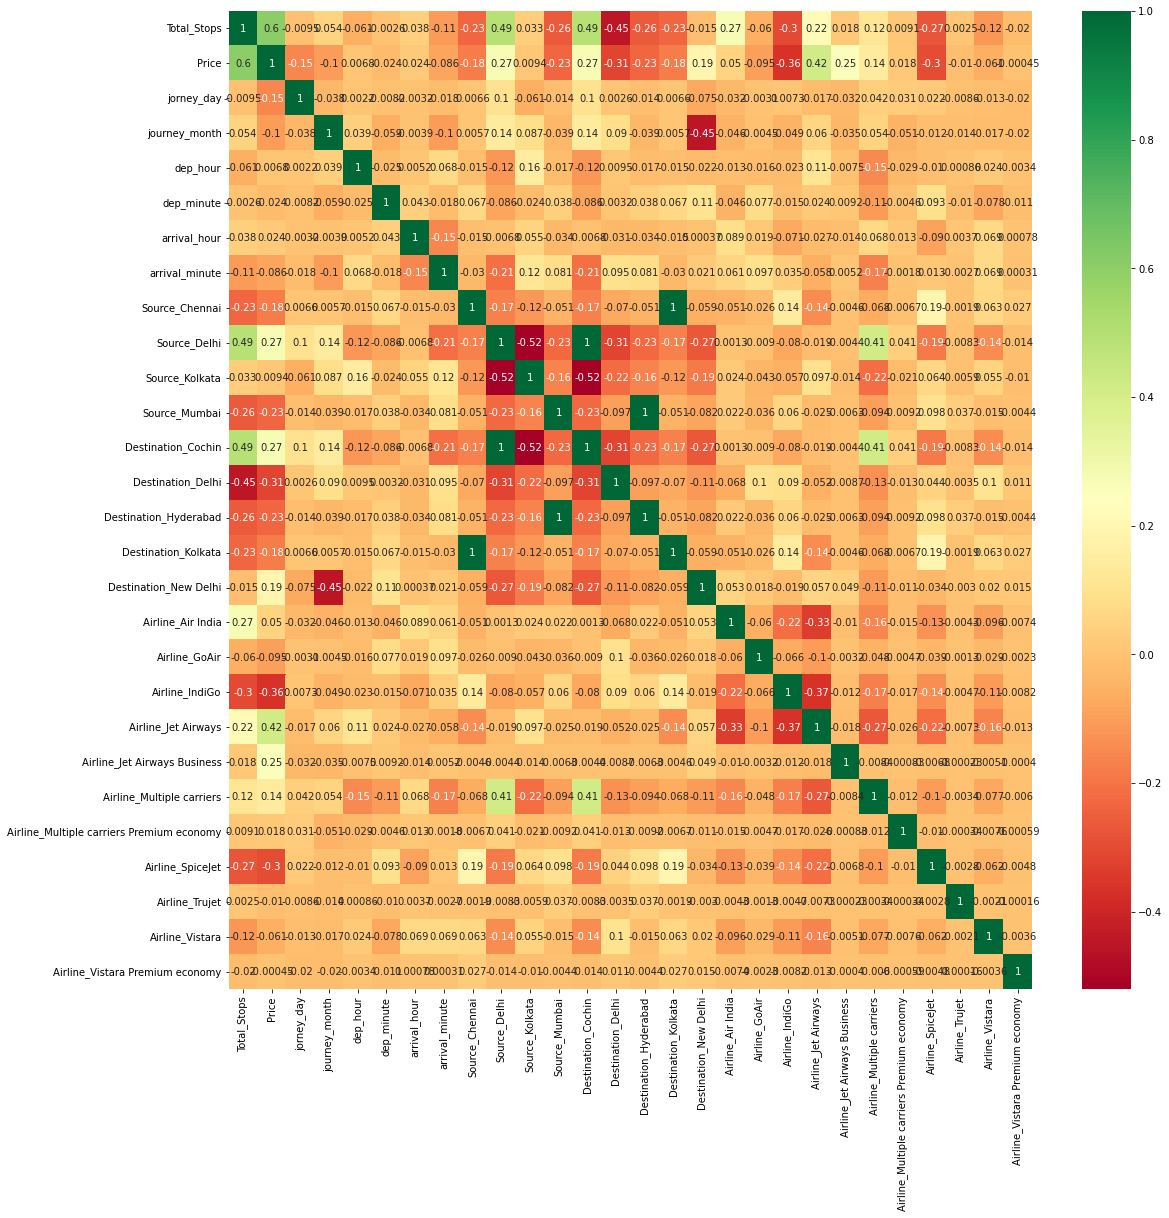

In [ ]:
plt.figure(figsize=(18,18))
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn')
plt.show()

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
selection=ExtraTreesRegressor()
selection.fit(x,y)

ExtraTreesRegressor()

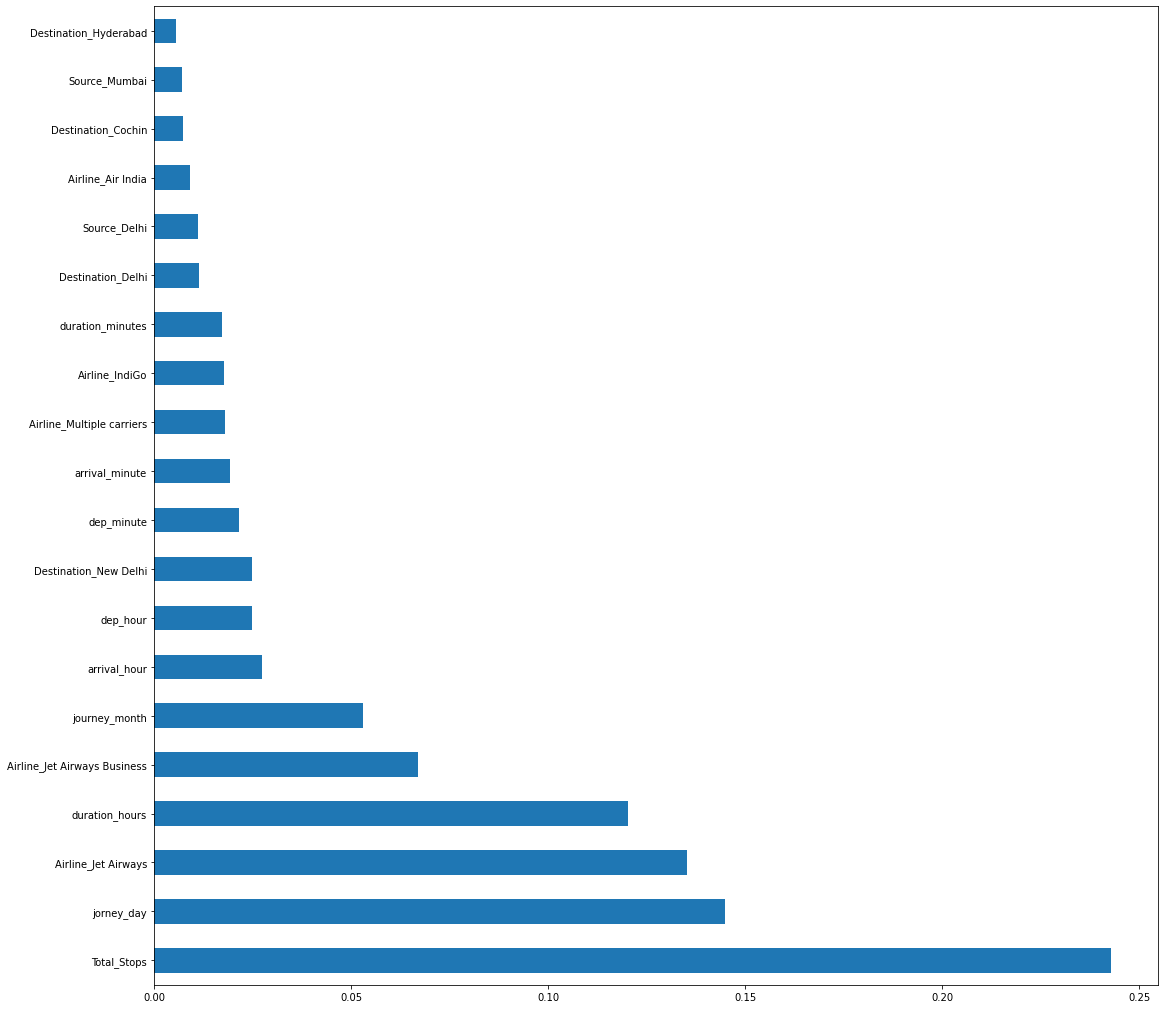

In [ ]:
plt.figure(figsize=(18,18))
feat_importances =pd.Series(selection.feature_importances_,index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
reg_rf=RandomForestRegressor()
reg_rf.fit(x_train,y_train)


RandomForestRegressor()

In [ ]:
y_pred=reg_rf.predict(x_test)

In [ ]:
reg_rf.score(x_train,y_train)

0.9558825377886913

In [ ]:
reg_rf.score(x_test,y_test)

0.7971592772900525

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


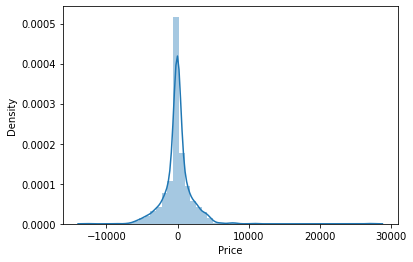

In [ ]:
sns.distplot(y_test-y_pred)
plt.show()

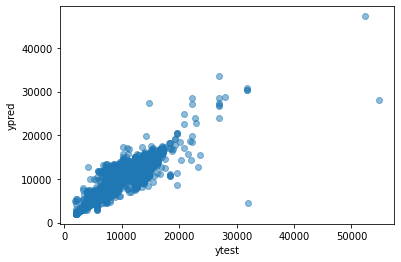

In [ ]:
plt.scatter(y_test,y_pred,alpha=0.5)
plt.xlabel("ytest")
plt.ylabel("ypred")
plt.show()

In [ ]:
from sklearn import metrics

In [ ]:
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))


MAE: 1214.5256375424476
MSE: 4206159.756225736
RMSE: 2050.8924292184943


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
n_estimators =[ int(x) for x in np.linspace(start=100,stop=1200,num=12)]
max_features=['auto','sqrt']
max_depth =[int(x) for x in np.linspace(50,30,num=6)]
min_samples_split=[2,5,10,15,100,900]
min_samples_leaf=[1,2,5,10]



In [ ]:
random_grid={
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf
}

In [ ]:
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)


In [ ]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=700; total time=  11.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=700; total time=  10.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=700; total time=   6.8s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=700; total time=   6.6s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=700; total time=   6.7s
[CV] END max_depth=46, max_features=auto, min_samples_leaf=10, min_samples_split=900, n_estimators=900; total time=   6.9s
[CV] END max_depth=46, max_features=auto, min_samples_leaf=10, min_samples_split=900, n_estimators=900; total time=   6.9s
[CV] END max_depth=46, max_features=auto, min_samples_leaf=10, min_samples_split=900, n_estim

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [50, 46, 42, 38, 34, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15, 100,
                                                              900],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [ ]:
rf_random.best_params_

{'max_depth': 42,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 300}

In [ ]:
prediction = rf_random.predict(x_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


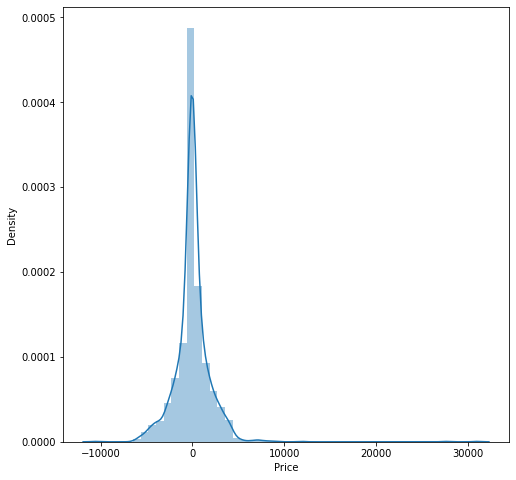

In [ ]:
plt.figure(figsize=(8,8))
sns.distplot(y_test-prediction)
plt.show()

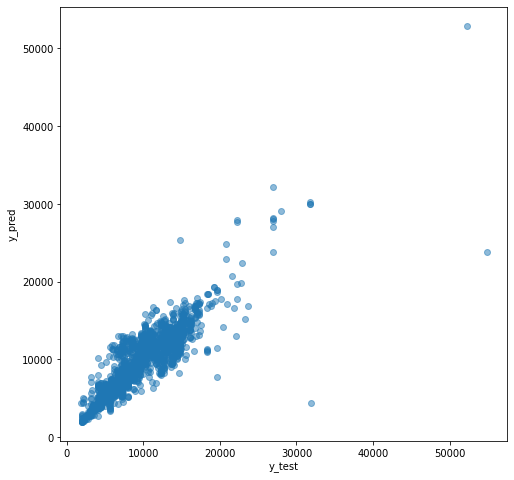

In [ ]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1182.053762595133
MSE: 3953118.057753656
RMSE: 1988.2449692514392


In [ ]:
import pickle
file=open('flight_rf.pkl','wb')
pickle.dump(reg_rf,file)

In [ ]:
model=open('flight_rf.pkl','rb')
forest=pickle.load(model)


In [ ]:
y_prediction=forest.predict(x_test)

In [ ]:
metrics.r2_score(y_test,y_prediction)

0.7971592772900525